___
# Lecture 4 - Clustering Data and Heatmaps
___

## Review

* Python's `statsmodels` function can be used for performing regression
* Regression is helpful when you want to perform `feature selection` and/or `classification`
* Generalized Linear Models (`GLM`) are regression models with relaxed assumptions

## Import necessary packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### (1) [Introduction to clustering](#1)
#### (2) [Distance measures](#2)
#### (3) [Clustering algorithms](#3)
#### (4) [Application to real data](#4)
#### (5) [Visualizing with clustermaps](#5)
#### (6) [Challenges](#6)
#### (7) [Extra resources](#7)

## Introduction to Clustering <a class="anchor" id="1"></a>

[Liang-Wong et. al., Calico Life Sciences LLC, 2019 (eLIFE)](https://elifesciences.org/articles/42940)
<img src="img/tsne_clust.png" width="400" height="400">

## Lesson Outline

###### We won't focus on `tSNE` in this lesson, but if you are interested...
`tSNE` is another method for dimensionality reduction, which is similar to `PCA` except it does not preserve distances between data points. You can read more about `tSNE` [here](https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm). In practice, it is very effective for single cell data. 

### How are the points above being colored?

Dimensionality reduction can be used to visualize our data, but it doesn't actually define clusters. Those are defined by clustering algorithms!

### Lets create some toy data to introduce these concepts

In [4]:
from sklearn.datasets.samples_generator import make_blobs

In [5]:
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=0.6, random_state=0)

<h3 style="color:red;"> How many clusters do we have? </h3>

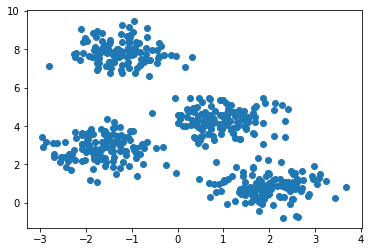

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## Distance Metrics <a class="anchor" id="2"></a>

#### Clustering relies on distance (or similarity) between points
<!-- -->     |     __Distance__     |  __Similarity__ |
-------------|:--------------------:|:---------------:|
__Range__    |   $[0,\infty)$      | $[0,1]$         |
__Examples__  | _Euclidian_, _Hamming_,<br>_Cosine_, etc. |  _Correlation_, _Cosine_, etc.  |


```
If data is standardized: Similarity = 1 - Distance
```

In [7]:
from sklearn.metrics.pairwise import pairwise_distances

```python
> ?pairwise_distances
```
```
Valid values for metric are:

- From scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
  'manhattan']. These metrics support sparse matrix inputs.

- From scipy.spatial.distance: ['braycurtis', 'canberra', 'chebyshev',
  'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis',
  'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
  'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
  See the documentation for scipy.spatial.distance for details on these
  metrics. These metrics do not support sparse matrix inputs.
  ```

`Euclidean Distance`
![](https://cdn-images-1.medium.com/max/1600/1*n6kmkzjKVTOWeXDxsx2daQ.png)

In [8]:
euc_dist = pairwise_distances(X,metric="euclidean")

In [9]:
print("Euclidean Info")
print("---------------")
print("Min Distance: {}".format(euc_dist.min()))
print("Max Distance: {}".format(euc_dist.max()))
print("Average Distance: {}".format(euc_dist.mean()))

Euclidean Info
---------------
Min Distance: 0.0
Max Distance: 10.860837629626596
Average Distance: 3.770981926559043


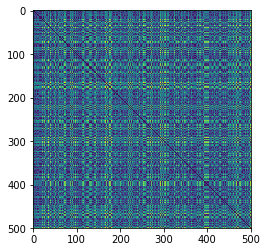

In [10]:
plt.imshow(euc_dist)
plt.show()

<h3 style="color:red;"> Group Exercise: How can we order our data such that pairs with lower distances are closer to each other?   </h3>

In [21]:
X_sorted = X.sort(order=y_true)

ValueError: Cannot specify order when the array has no fields.

In [13]:
euc_dist_sort = pairwise_distances(X_sorted,metric="euclidean")
plt.imshow(euc_dist_sort)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Popular Clustering Algorithms <a class="anchor" id="3"></a>

###### `kmeans`
<img src="https://assets.yihui.name/figures/animation/example/kmeans-ani/demo-c.mp4?dl=1" width="350" height="350">

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0)
preds_kmeans = kmeans.fit_predict(X)
preds_kmeans[:50]

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
plt.scatter(X[:,0],X[:,1],c=preds_kmeans,cmap="viridis")
plt.scatter(centers[:,0], centers[:,1],color="gray",s=200)
plt.show()

###### `hierarchical`

Introduces an additional concept called `linkage`:

<img src="https://www.researchgate.net/profile/Pamela_Guevara/publication/281014334/figure/fig57/AS:418517879934980@1476793847581/The-three-linkage-types-of-hierarchical-clustering-single-link-complete-link-and.png" width="400" height="400">

Visualization for hierarchical clustering:

| Dendogram             |  Plot |
|-------------------------|-------------------------|
|<img src="https://people.revoledu.com/kardi/tutorial/Clustering/image/Numerical%20Example_clip_image040.jpg" width="200" height="200">  | <img src="https://people.revoledu.com/kardi/tutorial/Clustering/image/Numerical%20Example_clip_image042.jpg" width="200" height="200">|

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linked = linkage(X,method="ward") # output is matrix that is used to contruct tree. Columns 1 and 2 defines new combined cluster at the ith iteration, Column 3 has distance between clusters, and Column 4 has the number of observations in each cluster   
dendrogram(linked)
plt.show()  

In [ ]:
hclust = AgglomerativeClustering(n_clusters=4,linkage="ward",)
preds_hclust = hclust.fit_predict(X)
preds_hclust[:50]

In [ ]:
plt.scatter(X[:,0],X[:,1],c=preds_hclust,cmap="viridis")
plt.show()

<h3 style="color:red;"> Exercise: What happens when you change the linkage for hierarchical clustering? </h3>

Try `single`, `complete`, and `average` linkages with `n_clusters=4`. You can overwrite the above function **OR**...

For a **challenge** try these two extensions:
1. Prevent copying and pasting multiple times by writing a function that takes **linkage type** and **the data** as input and outputs **predictions**. (_You can also output the plot if you would like!_)


2. Use `plt.subplots` to combine the scatter plots for each linkage type into one main plot. We haven't shown you how to use this function in the course yet, but if you type `?plt.subplots` and scroll down there are helpful examples! 

In [ ]:
def return_preds_hclust(data,link_type):
    return

In [ ]:
# Uncomment this line if you want to combine the plots together
# fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,4))

return_preds_hclust(X,"single")
return_preds_hclust(X,"complete")
return_preds_hclust(X,"average")

# plt.show()

<h3 style="color:red;"> Which clustering algorithm should you use?   </h3>

Problems with each:

`hierarchical`
* Takes more time, not great for large datasets
* Extra linkage parameter

`kmeans`
* Not as reproducible (dependent on choice of centers)
* Requires you to choose expected number of clusters
* Best used for hyperspherical clusters
* Can only be used with Euclidian distance

## Application to Real Data <a class="anchor" id="4"></a>

### Load the data

In [17]:
expr_data_meta = pd.read_csv("inSphero.abundance.table_edit190410_no_outlier.csv",index_col=0)
expr_data = expr_data_meta.drop("symbol",axis=1)
annots = expr_data_meta.loc[:,["symbol"]]
description = pd.read_csv("inSphero_doe_edit190410.csv",index_col=1)

In [18]:
expr_data_t = expr_data.T

<h3 style="color:red;"> Exercise: Plot heatmap of euclidean distance between samples  </h3>

Hint: Use the `pairwise_distances()` and `plt.imshow` functions from before. 

Be mindful of which data to use (`expr_data` or `expr_data_t`). Make sure to check expected input for functions!

### KMeans Clustering

In [ ]:
kmeans_expr = KMeans(n_clusters=4,random_state=0)

In [ ]:
preds_kmeans_expr = kmeans_expr.fit_predict(expr_data_t)

In [ ]:
pd.DataFrame(preds_kmeans_expr,index=expr_data_t.index,columns=["label_kmeans"])

## Hierarchical Clustering <a class="anchor" id="4"></a>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linked = linkage(expr_data_t, method='ward',metric="euclidean")
labels = expr_data.columns
plt.figure(figsize=(6, 4))  
dendrogram(linked,  
            orientation='top',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()  

In [ ]:
hclust_expr = AgglomerativeClustering(n_clusters=4,linkage="ward",affinity="euclidean")
preds_hclust_expr = hclust_expr.fit_predict(expr_data_t)

In [ ]:
pd.DataFrame(preds_hclust_expr,index=expr_data_t.index,columns=["label_hclust"])

## Visualizing with Clustermaps <a class="anchor" id="5"></a>

In [ ]:
clust_out = sns.clustermap(expr_data,vmin=-3,vmax=6,center=0,cmap="bwr",)
plt.show()

## Challenge Problems <a class="anchor" id="6"></a>

### What happens when you use different distance metrics for hierarchical clustering our real data?

Hint: You can visualize distance with `pairwise_distances()` and `plt.imshow()`. Change the `affinity` parameter in `AgglomerativeClustering()` 

```
Clustering accuracy is dependent on the distance measure used!!
```

### Create contingency or confusion matrix to compare true and predicted cluster pairs with either the toy or real data

```
For fun you can also make a heatmap. This will also give us insight into which clusters numbers correspond to each other.
```

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

### Summarize similarity between kmeans and hierarchical cluster outputs using rand index (see below) with either the toy or real data

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

## Extra Resources <a class="anchor" id="7"></a>

### Evaluating cluster validaty

#### Externally (true labels are known)
* [contingency table](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.contingency_matrix.html)
* [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
* [rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

#### Internally (true labels are unknown)
* [silhouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

#### Relativally (comparing two different clusterings)
* [jaccard score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score)
* [rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

### Sklearn clustering [documentation](https://scikit-learn.org/stable/modules/clustering.html) with additional metrics.

### [Other Clustering Algorithms](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html)


### Indepth Illustration of K-means


##### Is k-means reproducible? 
**Hint:** try changing the random seed for the kmeans algorithm. Some good ones are `random_state=30` and `random_state=2`.

In [ ]:
# Simulating data with less samples and more clusters
X_noise, y_true_noise = make_blobs(n_samples=200, centers=5,
                       cluster_std=0.5, random_state=0)

# Creating subplot figure
fig, ax = plt.subplots(3,3,figsize=(20,10),sharey=True,sharex=True)
ax = ax.ravel()

# Plotting raw, un-clustered data
ax[0].scatter(X_noise[:,0],X_noise[:,1],color="black")
ax[0].set_title("Raw Data",fontsize=20)

# Want to stop kmeans at a max number of iterations (it) so we are going to try a range
for it in range(1,8):
    
    # Run KMeans, choose centers randomly, only let algorithm run for max number of iterations
    kmeans_iter = KMeans(n_clusters=5,random_state=30,init="random",n_init=1,max_iter=it) # Update the random state here
    preds_kmeans_iter = kmeans_iter.fit_predict(X_noise)
    centers = kmeans_iter.cluster_centers_
    
    # Plot the data and color by the current predictions at this iteration
    ax[it].scatter(X_noise[:,0],X_noise[:,1],c=preds_kmeans_iter,cmap="viridis")
    ax[it].scatter(centers[:,0], centers[:,1],color="gray",s=200)
    ax[it].set_title("Iteration = {}".format(it),fontsize=20)

# Also plot the true labels
ax[-1].scatter(X_noise[:,0],X_noise[:,1],c=y_true_noise,cmap="viridis")
ax[-1].set_title("True Labels",fontsize=20)
plt.show()